RecoMart Recommendation System - Exploratory Data Analysis

1. Loading Data...
✓ Loaded 10050 interactions
  Columns: ['user_id', 'item_id', 'rating', 'timestamp', 'extra_column']
  Shape: (10050, 5)

2. Basic Statistics
----------------------------------------------------------------------
            user_id       item_id       rating
count  10050.000000  10050.000000  9950.000000
mean     504.407861    248.902189     2.978593
std      289.631817    144.394676     1.418558
min        1.000000      1.000000     0.000000
25%      251.000000    122.000000     2.000000
50%      506.000000    250.000000     3.000000
75%      758.000000    374.000000     4.000000
max     1000.000000    500.000000     6.000000

3. Data Types
----------------------------------------------------------------------
user_id           int64
item_id           int64
rating          float64
timestamp        object
extra_column     object
dtype: object

4. Missing Values
----------------------------------------------

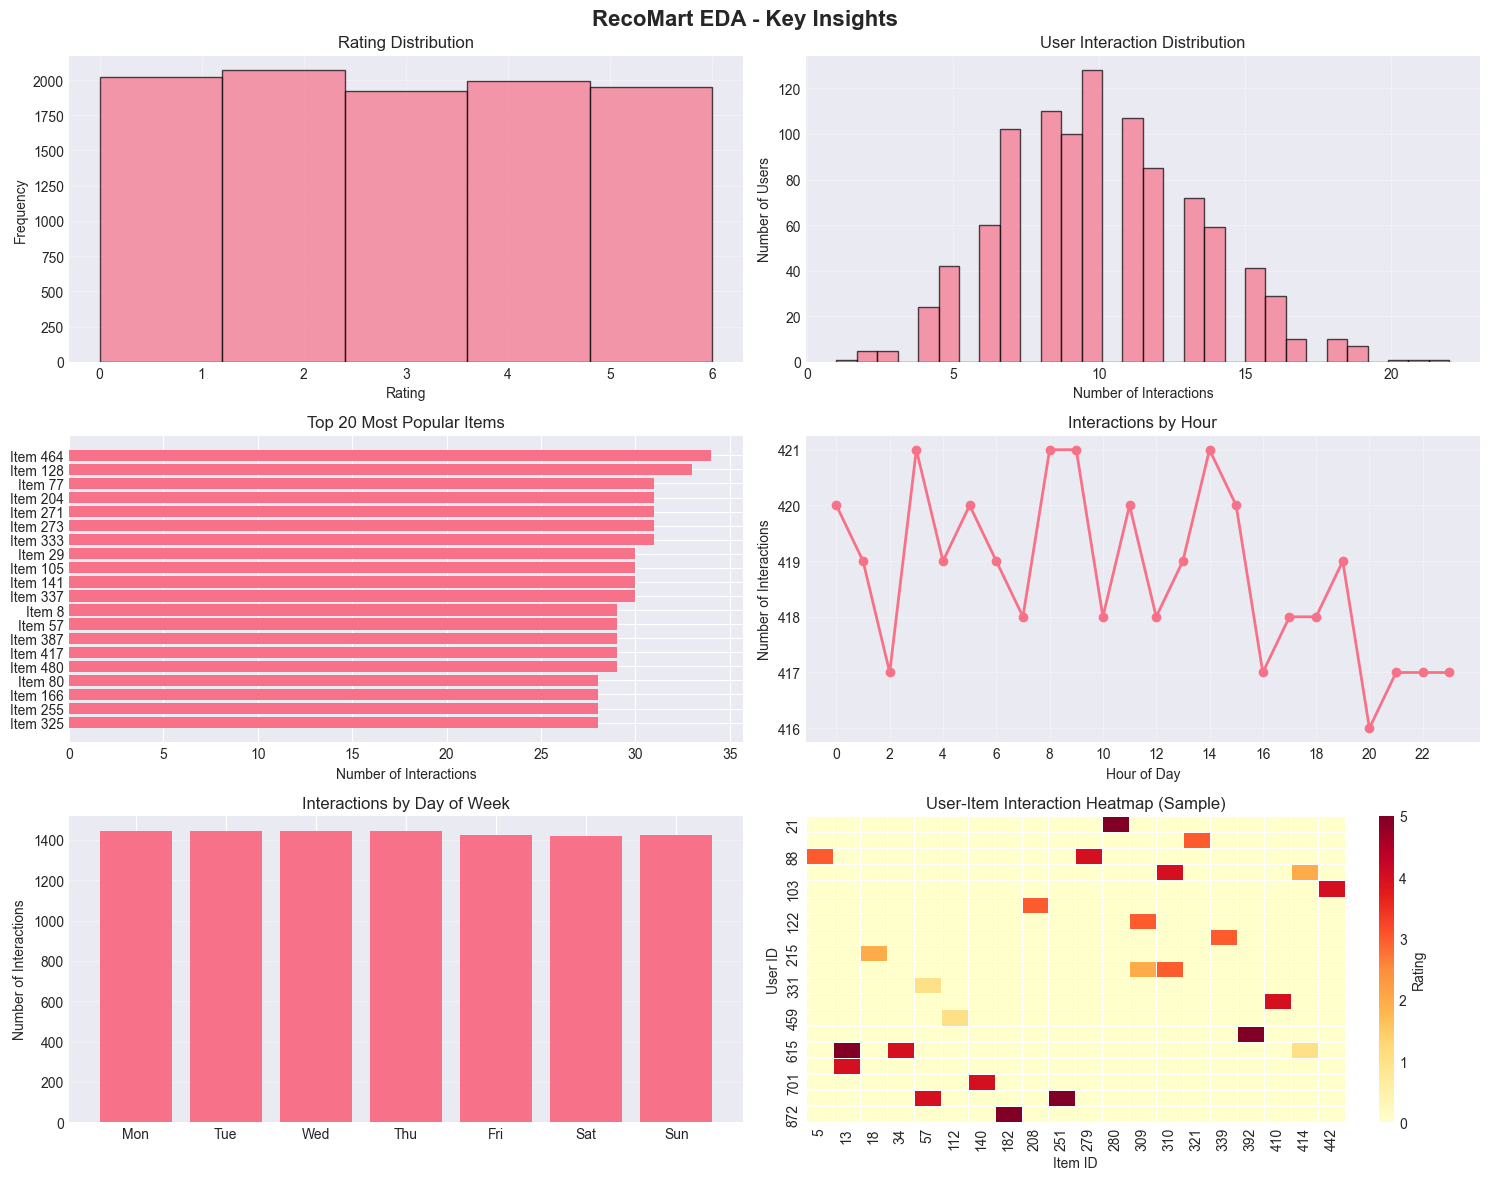


11. Power Users Analysis
----------------------------------------------------------------------
Top 10 Power Users:
     user_id  interaction_count  avg_rating  rating_std
725      726                 22    3.190476    1.364516
928      929                 21    2.809524    1.470342
72        73                 20    3.150000    1.348488
821      822                 19    2.631579    1.342077
824      825                 19    3.052632    1.432701
38        39                 19    3.315789    1.492672
890      891                 19    3.000000    1.644957
775      776                 19    2.578947    1.609548
153      154                 19    3.368421    1.498537
272      273                 19    3.631579    1.422460

Power Users (top 10%): 100
Average interactions: 16.25

12. Long Tail Analysis
----------------------------------------------------------------------
Items representing 80% of interactions: 364 (72.8%)
Long tail items (bottom 50%): 250

13. Cold Start Analysis
-----

In [4]:
"""
Exploratory Data Analysis for RecoMart Recommendation System
This script can be converted to a Jupyter notebook
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*70)
print("RecoMart Recommendation System - Exploratory Data Analysis")
print("="*70)

# Load data
print("\n1. Loading Data...")
interactions_df = pd.read_csv('../data/batch/user_interactions.csv')
print(f"✓ Loaded {len(interactions_df)} interactions")
print(f"  Columns: {list(interactions_df.columns)}")
print(f"  Shape: {interactions_df.shape}")

# Basic statistics
print("\n2. Basic Statistics")
print("-" * 70)
print(interactions_df.describe())

print("\n3. Data Types")
print("-" * 70)
print(interactions_df.dtypes)

print("\n4. Missing Values")
print("-" * 70)
missing = interactions_df.isnull().sum()
missing_pct = (missing / len(interactions_df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0])

# User analysis
print("\n5. User Analysis")
print("-" * 70)
n_users = interactions_df['user_id'].nunique()
n_items = interactions_df['item_id'].nunique()
print(f"Unique Users: {n_users:,}")
print(f"Unique Items: {n_items:,}")
print(f"Total Interactions: {len(interactions_df):,}")
print(f"Sparsity: {(1 - len(interactions_df)/(n_users*n_items))*100:.2f}%")

# User interaction distribution
print("\n6. User Interaction Distribution")
print("-" * 70)
user_interactions = interactions_df.groupby('user_id').size()
print(f"Mean interactions per user: {user_interactions.mean():.2f}")
print(f"Median interactions per user: {user_interactions.median():.2f}")
print(f"Max interactions per user: {user_interactions.max()}")
print(f"Min interactions per user: {user_interactions.min()}")

# Item popularity
print("\n7. Item Popularity")
print("-" * 70)
item_interactions = interactions_df.groupby('item_id').size()
print(f"Mean interactions per item: {item_interactions.mean():.2f}")
print(f"Median interactions per item: {item_interactions.median():.2f}")
print(f"Max interactions per item: {item_interactions.max()}")
print(f"Top 10 most popular items:")
print(item_interactions.nlargest(10))

# Rating analysis
print("\n8. Rating Distribution")
print("-" * 70)
rating_dist = interactions_df['rating'].value_counts().sort_index()
print(rating_dist)
print(f"\nMean Rating: {interactions_df['rating'].mean():.2f}")
print(f"Median Rating: {interactions_df['rating'].median():.2f}")
print(f"Std Dev: {interactions_df['rating'].std():.2f}")

# Temporal analysis
print("\n9. Temporal Analysis")
print("-" * 70)
interactions_df['timestamp'] = pd.to_datetime(interactions_df['timestamp'])
interactions_df['date'] = interactions_df['timestamp'].dt.date
interactions_df['hour'] = interactions_df['timestamp'].dt.hour
interactions_df['dayofweek'] = interactions_df['timestamp'].dt.dayofweek

daily_interactions = interactions_df.groupby('date').size()
print(f"Date range: {interactions_df['timestamp'].min()} to {interactions_df['timestamp'].max()}")
print(f"Mean daily interactions: {daily_interactions.mean():.2f}")

# Visualization function
def create_visualizations():
    """Create and save EDA visualizations"""
    
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    fig.suptitle('RecoMart EDA - Key Insights', fontsize=16, fontweight='bold')
    
    # 1. Rating Distribution
    axes[0, 0].hist(interactions_df['rating'], bins=5, edgecolor='black', alpha=0.7)
    axes[0, 0].set_xlabel('Rating')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Rating Distribution')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. User Interaction Distribution
    user_counts = interactions_df.groupby('user_id').size()
    axes[0, 1].hist(user_counts, bins=30, edgecolor='black', alpha=0.7)
    axes[0, 1].set_xlabel('Number of Interactions')
    axes[0, 1].set_ylabel('Number of Users')
    axes[0, 1].set_title('User Interaction Distribution')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Item Popularity (Top 20)
    item_counts = interactions_df.groupby('item_id').size().nlargest(20)
    axes[1, 0].barh(range(len(item_counts)), item_counts.values)
    axes[1, 0].set_yticks(range(len(item_counts)))
    axes[1, 0].set_yticklabels([f'Item {i}' for i in item_counts.index])
    axes[1, 0].set_xlabel('Number of Interactions')
    axes[1, 0].set_title('Top 20 Most Popular Items')
    axes[1, 0].invert_yaxis()
    
    # 4. Hourly Pattern
    hourly = interactions_df.groupby('hour').size()
    axes[1, 1].plot(hourly.index, hourly.values, marker='o', linewidth=2)
    axes[1, 1].set_xlabel('Hour of Day')
    axes[1, 1].set_ylabel('Number of Interactions')
    axes[1, 1].set_title('Interactions by Hour')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].set_xticks(range(0, 24, 2))
    
    # 5. Day of Week Pattern
    dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    dow_counts = interactions_df.groupby('dayofweek').size()
    axes[2, 0].bar(range(7), [dow_counts.get(i, 0) for i in range(7)])
    axes[2, 0].set_xticks(range(7))
    axes[2, 0].set_xticklabels(dow_names)
    axes[2, 0].set_ylabel('Number of Interactions')
    axes[2, 0].set_title('Interactions by Day of Week')
    axes[2, 0].grid(True, alpha=0.3, axis='y')
    
    # 6. User-Item Heatmap (sample)
    sample_users = interactions_df['user_id'].unique()[:20]
    sample_items = interactions_df['item_id'].unique()[:20]
    sample_df = interactions_df[
        (interactions_df['user_id'].isin(sample_users)) & 
        (interactions_df['item_id'].isin(sample_items))
    ]
    pivot = sample_df.pivot_table(
        index='user_id', 
        columns='item_id', 
        values='rating',
        fill_value=0
    )
    sns.heatmap(pivot, cmap='YlOrRd', cbar_kws={'label': 'Rating'}, 
                ax=axes[2, 1], linewidths=0.5)
    axes[2, 1].set_title('User-Item Interaction Heatmap (Sample)')
    axes[2, 1].set_xlabel('Item ID')
    axes[2, 1].set_ylabel('User ID')
    
    plt.tight_layout()
    
    # Save plot
    output_path = Path('reports/eda_visualizations.png')
    output_path.parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"\n✓ Visualizations saved to: {output_path}")
    
    plt.show()

# Generate visualizations
print("\n10. Generating Visualizations...")
print("-" * 70)
create_visualizations()

# Power users analysis
print("\n11. Power Users Analysis")
print("-" * 70)
user_stats = interactions_df.groupby('user_id').agg({
    'item_id': 'count',
    'rating': ['mean', 'std']
}).reset_index()
user_stats.columns = ['user_id', 'interaction_count', 'avg_rating', 'rating_std']
user_stats = user_stats.sort_values('interaction_count', ascending=False)

print("Top 10 Power Users:")
print(user_stats.head(10))

power_users = user_stats[user_stats['interaction_count'] > user_stats['interaction_count'].quantile(0.9)]
print(f"\nPower Users (top 10%): {len(power_users)}")
print(f"Average interactions: {power_users['interaction_count'].mean():.2f}")

# Long tail analysis
print("\n12. Long Tail Analysis")
print("-" * 70)
item_popularity = interactions_df.groupby('item_id').size().sort_values(ascending=False)
cumsum = item_popularity.cumsum() / item_popularity.sum() * 100

n_80_pct = (cumsum <= 80).sum()
print(f"Items representing 80% of interactions: {n_80_pct} ({n_80_pct/len(item_popularity)*100:.1f}%)")
print(f"Long tail items (bottom 50%): {len(item_popularity)//2}")

# Cold start analysis
print("\n13. Cold Start Analysis")
print("-" * 70)
new_users = user_stats[user_stats['interaction_count'] <= 2]
new_items = interactions_df.groupby('item_id').size()
new_items = new_items[new_items <= 2]

print(f"Users with ≤2 interactions: {len(new_users)} ({len(new_users)/len(user_stats)*100:.1f}%)")
print(f"Items with ≤2 interactions: {len(new_items)} ({len(new_items)/n_items*100:.1f}%)")

# Summary statistics
print("\n14. Summary Report")
print("="*70)
summary = {
    'Total Interactions': len(interactions_df),
    'Unique Users': n_users,
    'Unique Items': n_items,
    'Sparsity (%)': round((1 - len(interactions_df)/(n_users*n_items))*100, 2),
    'Avg Interactions/User': round(user_interactions.mean(), 2),
    'Avg Interactions/Item': round(item_interactions.mean(), 2),
    'Avg Rating': round(interactions_df['rating'].mean(), 2),
    'Rating Std Dev': round(interactions_df['rating'].std(), 2),
    'Date Range': f"{interactions_df['timestamp'].min().date()} to {interactions_df['timestamp'].max().date()}"
}

for key, value in summary.items():
    print(f"{key:.<40} {value}")

print("\n" + "="*70)
print("EDA Complete! Check reports/eda_visualizations.png for plots")
print("="*70)